In [11]:
from pandas import read_csv
import numpy as np

In [4]:
df = read_csv('international-airline-passengers.csv', usecols = [1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [9]:
train_size = int((values.shape[0] * 0.67)) #keeping 2/3 data as training and 1/3 as testing
test_size = values.shape[0] - train_size
train = values[0:train_size]
test = values[train_size:]

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [12]:
def create_dataset(data, k):
    dataX, dataY = [], []
    for i in range(data.shape[0] - k):
        x = data[i:i+k, 0]
        y = data[i+k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [15]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [19]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape

(84, 12, 1)

In [16]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [21]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer= 'adam')
model.fit(trainX, trainY, epochs=10, batch_size = 1)

Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5552
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1115
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1066
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0803
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0715
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0671
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0601
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0537
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0470
Epoch 10/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0386


In [23]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape, testTrue.shape

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


((36,), (36,))

In [24]:
from matplotlib import pyplot as plt

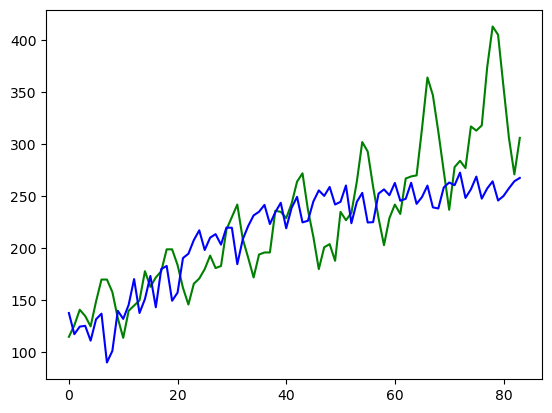

In [25]:
plt.plot(trainTrue, c = 'g') #color is green
plt.plot(trainPredict, c = 'b')

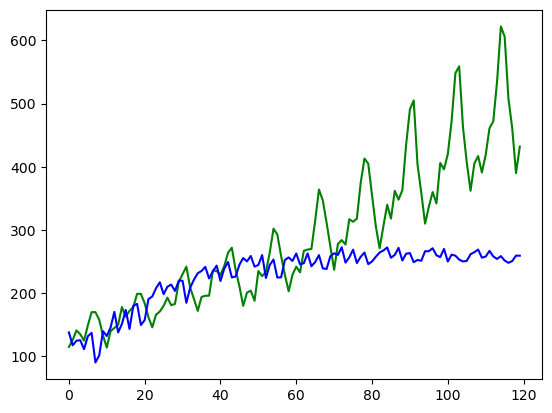

In [28]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPredicted, c='b')
plt.show()